In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

### Huron River: TP

In [4]:
stations = pd.read_csv('../../measurements/USGS stream data/OHIO station info.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (14,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
location = (41.356929, -82.341840)

In [131]:
csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(r_stations.MonitoringLocationIdentifier.unique())]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
df = csv_file_df[(csv_file_df['CharacteristicName']=="Phosphorus") & (csv_file_df['ResultSampleFractionText']=="Total")]
df  

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,...,ResultAnalyticalMethod/MethodName,MethodDescriptionText,LaboratoryName,AnalysisStartDate,ResultLaboratoryCommentText,DetectionQuantitationLimitTypeName,DetectionQuantitationLimitMeasure/MeasureValue,DetectionQuantitationLimitMeasure/MeasureUnitCode,PreparationStartDate,ProviderName
174652,21OHIO_WQX,Division of Surface water (Ohio),21OHIO_WQX-C1153,Sample-Routine,Water,NaN,2012-06-13,NaN,NaN,NaN,...,USEPA 365.4,NaN,DES,NaN,NaN,NaN,NaN,NaN,NaN,STORET
174679,21OHIO_WQX,Division of Surface water (Ohio),21OHIO_WQX-C3390,Sample-Routine,Water,NaN,2012-07-26,NaN,NaN,NaN,...,USEPA 365.4,NaN,DES,NaN,NaN,NaN,NaN,NaN,NaN,STORET
174711,21OHIO_WQX,Division of Surface water (Ohio),21OHIO_WQX-C3886,Sample-Routine,Water,NaN,2012-08-13,NaN,NaN,NaN,...,USEPA 365.4,NaN,DES,NaN,NaN,NaN,NaN,NaN,NaN,STORET
174741,21OHIO_WQX,Division of Surface water (Ohio),21OHIO_WQX-C6446,Sample-Routine,Water,NaN,2012-09-19,NaN,NaN,NaN,...,USEPA 365.4,NaN,DES,NaN,NaN,NaN,NaN,NaN,NaN,STORET
174779,21OHIO_WQX,Division of Surface water (Ohio),21OHIO_WQX-C6448,Sample-Routine,Water,NaN,2012-09-19,NaN,NaN,NaN,...,USEPA 365.4,NaN,DES,NaN,NaN,NaN,NaN,NaN,NaN,STORET


In [92]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=11.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all
# r_stations = stations[(stations.LatitudeMeasure>location[0]-0.2) & (stations.LatitudeMeasure<location[0]+0.2) &
#                      (stations.LongitudeMeasure>location[1]-0.2) & (stations.LongitudeMeasure<location[1]+0.2)]

# for ind, st in r_stations.iterrows():
#     folium.Marker(location=[st.LatitudeMeasure, st.LongitudeMeasure], popup=folium.Popup(html=st.MonitoringLocationIdentifier,show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')).add_to(m)


Show_IDS = [
["USGS-04199500", True],
# ["21OHIO_WQX-Y01S16", False],
# ["21OHIO_WQX-Y01G35", False],
# ["21OHIO_WQX-Y01Q02", False],
# ["21OHIO_WQX-501260", False],
# ["21OHIO_WQX-Y01S01", False],
# ["21OHIO_WQX-Y01G42", False],
# ["21OHIO_WQX-Y01G41", False],
# ["21OHIO_WQX-Y01S18", False],
# ["21OHIO_WQX-Y01S21", False],
# ["21OHIO_WQX-Y01S13", False],
]

# Show_IDS = [["21OHIO_WQX-K01E05", False],
#             ["21OHIO_WQX-501030", True],
#             ["USGS-04199000", True],
#             ["21OHIO_WQX-K01G16", False]]


for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = stations[stations.MonitoringLocationIdentifier == st]
    folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0], 
                            st_df.LongitudeMeasure.values[0]], radius=20, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index==99:
        folium.map.Marker(
        location=[st_df.LatitudeMeasure.values[0]+0.0065,st_df.LongitudeMeasure.values[0]-0.003],
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt">{}</div>'.format(index+1),
            )
        ).add_to(m)

# discarge_st = [["USGS-04195820", True]]
# for ind, st_dic in enumerate(discarge_st):
#     print(st)
#     st = st_dic[0]
#     if st_dic[1]:
#         clr='#f44242'
#     else:
#         clr='#0b15c4'
#     icon_number = BeautifyIcon(
#     border_color=clr,
#     text_color=clr,
#     number=index+2,
#     inner_icon_style='margin-top:0;')
#     st_df = stations[stations.MonitoringLocationIdentifier == st]
#     folium.Marker(location=[st_df.LatitudeMeasure.values[0], 
#                             st_df.LongitudeMeasure.values[0]], 
#                   popup=folium.Popup(html=st_df.MonitoringLocationIdentifier.values[0].split("-")[-1],show=False, max_width=10), 
#                   icon=icon_number).add_to(m)
    
# minimap = MiniMap(width=120, height=80, zoom_level_offset=-6, tile_layer = "stamenwatercolor")
# m.add_child(minimap)
m



USGS-04199500


In [58]:
all_stations = [s[0] for s in Show_IDS]
all_stations = ['HTLP (NCWQR)']

In [40]:
WQP_name = "Phosphorus"

ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/OHIO samples.zip').open(name='result.csv'))


csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(all_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



(0, 63)

In [41]:
df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/TP_Vermilion_River_data.csv')

df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
df_heideleberg['MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'
df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
df_heideleberg['ResultMeasureValue']=df_heideleberg['TP, mg/L as P']
sp= sp.append(df_heideleberg)
sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
sp['Station']=sp['MonitoringLocationIdentifier']
sp.shape


(2688, 67)

In [59]:
pt = sns.color_palette("colorblind", len(all_stations))

In [60]:
all_stations

['HTLP (NCWQR)']

In [2]:
river='Vermilion_R'

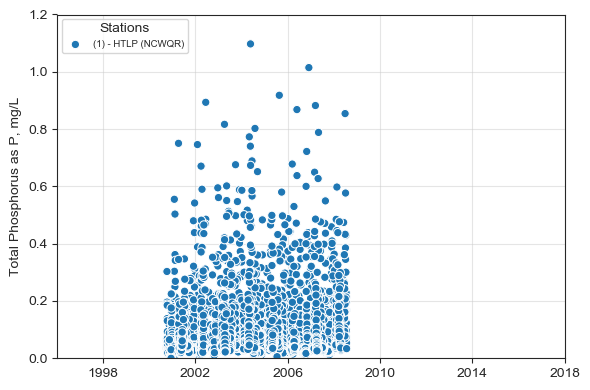

In [93]:

fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
ax = sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=all_stations, hue='MonitoringLocationIdentifier')
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(all_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc=2)

ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,1.2)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus as P, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('One_by_one/Western/US/'+river+'/'+river+'_TP.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_TP.pdf')



In [51]:
Show_IDS

[['USGS-04199500', False], ['21OHIO_WQX-Y01G42', False]]

In [53]:
master_stations = [st[0] for st in Show_IDS if st[1]]
master_stations = ['HTLP (NCWQR)']

In [54]:
master_st_df = sp[sp.MonitoringLocationIdentifier.isin(master_stations)][['ActivityStartDate','USGSPCode', 'ResultMeasureValue']]

In [55]:
master_st_df['USGSPCode'] = 0

In [65]:
master_st_df.to_csv('One_by_one/Western/US/'+river+'/TP_'+river+'iver_data.csv', index=False)

In [66]:
print(sp.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().reindex(all_stations).round(2).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   count &  mean &   std &  min &   25\% &   50\% &   75\% &   max \\
MonitoringLocationIdentifier &         &       &       &      &       &       &       &       \\
\midrule
HTLP (NCWQR)                 &  2688.0 &  0.11 &  0.13 &  0.0 &  0.04 &  0.07 &  0.14 &  2.01 \\
\bottomrule
\end{tabular}



### Discharge

In [120]:
# Finde station here:
# https://www.hydrocloud.org
site = '04199500'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
discharge = hf.extract_nwis_df(response.json())

In [121]:
discharge.columns

Index(['USGS:04199500:00060:00003', 'USGS:04199500:00060:00003_qualifiers'], dtype='object')

In [122]:
discharge['Flow, CFS']=discharge['USGS:04199500:00060:00003']

In [123]:
discharge= discharge.reset_index()
discharge['Date']  = discharge['datetime']
discharge['Date'] =pd.to_datetime(discharge['Date'], errors='coerce')
discharge = discharge[['Date', 'Flow, CFS']]
discharge['Source'] = 'USGS-04199500'

In [124]:
discharge[discharge.Source=='USGS-04199500'][['Date', 'Flow, CFS']].dropna().to_csv('One_by_one/Western/US/'+river+'/Flow_'+river+'_CFS.csv', index=False)


In [116]:
df_Q_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/Flow_Vermilion_River_data.csv')
df_Q_heideleberg['Date'] =pd.to_datetime(df_Q_heideleberg['Date'], errors='coerce')
df_Q_heideleberg['Source'] = 'HTLP (NCWQR)'
# df_Q_heideleberg['Discharge, cms'] = 0.028*df_Q_heideleberg['Flow, CFS']


In [117]:
discharge = discharge.append(df_Q_heideleberg)

In [125]:
discharge['Discharge, cms'] = 0.028*discharge['Flow, CFS']

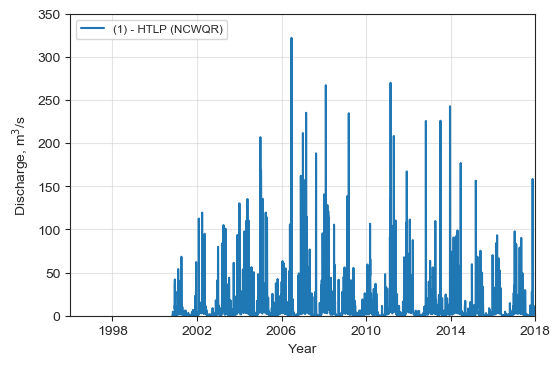

In [128]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['(1) - HTLP (NCWQR)'], loc=2, fontsize='small')
ax.set_ylim(0,350)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('One_by_one/Western/US/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_Q.pdf')

In [129]:
discharge[['Date', 'Flow, CFS']].to_csv('One_by_one/Western/US/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### EGRET Results

In [3]:

EGRET_Daily = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US/One_by_one/Western/US/Vermilion_R/EGRET Result/TP/Vermilion_River_TP_Daily.csv')
EGRET_Sample = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US/One_by_one/Western/US/Vermilion_R/EGRET Result/TP/Vermilion_River_TP_Sample.csv')


In [4]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


In [5]:
river = 'Vermilion_R'

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


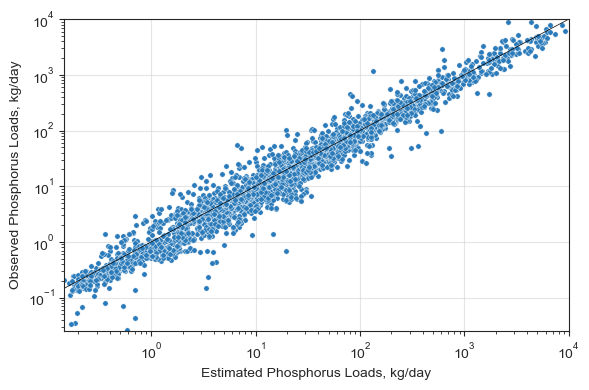

In [6]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,100000],[-100,100000], 'k', lw=0.5)
plt.xlim(0,10_000)
plt.ylim(0,10_000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Phosphorus Loads, kg/day")
plt.ylabel("Observed Phosphorus Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_FvsF.pdf')


In [7]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


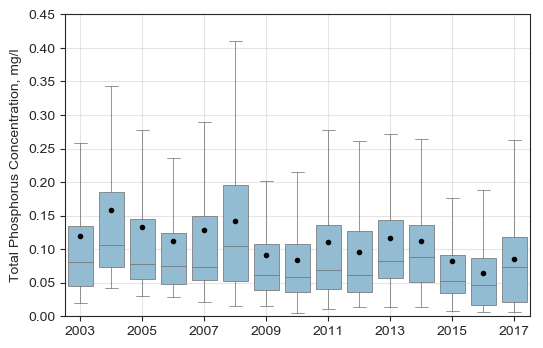

In [8]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(1.5, 16.5)
plt.xticks([int(x) for x in np.linspace(2,16,8)], [int(x) for x in np.linspace(2003,2017, 8)])
plt.ylim(0,0.45)

plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus Concentration, mg/l")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_PC.pdf')

In [153]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




In [154]:
EGRET_Sample

,Unnamed: 0,Date,Q,LogQ,ConcLow,ConcHigh,Uncen,ConcAve,Julian,Month,...,DecYear,MonthSeq,waterYear,SinDY,CosDY,yHat,SE,ConcHat,Fx_Hat,Fx_C
0,1,2000-10-02,NaN,NaN,0.066000,0.066000,1,0.066000,55061,10,...,2000.752846,1810,2001,-0.999840,0.017882,NaN,NaN,NaN,NaN,NaN
1,2,2000-10-03,NaN,NaN,0.041000,0.041000,1,0.041000,55062,10,...,2000.755578,1810,2001,-0.999386,0.035042,NaN,NaN,NaN,NaN,NaN
2,3,2000-10-04,NaN,NaN,0.036000,0.036000,1,0.036000,55063,10,...,2000.758311,1810,2001,-0.998637,0.052193,NaN,NaN,NaN,NaN,NaN
3,4,2000-10-05,NaN,NaN,0.034000,0.034000,1,0.034000,55064,10,...,2000.761043,1810,2001,-0.997594,0.069328,NaN,NaN,NaN,NaN,NaN
4,5,2000-10-06,NaN,NaN,0.303000,0.303000,1,0.303000,55065,10,...,2000.763775,1810,2001,-0.996257,0.086443,NaN,NaN,NaN,NaN,NaN
5,6,2000-10-07,NaN,NaN,0.196000,0.196000,1,0.196000,55066,10,...,2000.766507,1810,2001,-0.994626,0.103532,NaN,NaN,NaN,NaN,NaN
6,7,2000-10-08,NaN,NaN,0.189000,0.189000,1,0.189000,55067,10,...,2000.769240,1810,2001,-0.992702,0.120591,NaN,NaN,NaN,NaN,NaN
7,8,2000-10-09,NaN,NaN,0.138500,0.138500,1,0.138500,55068,10,...,2000.771972,1810,2001,-0.990486,0.137615,NaN,NaN,NaN,NaN,NaN
8,9,2000-10-10,NaN,NaN,0.185000,0.185000,1,0.185000,55069,10,...,2000.774704,1810,2001,-0.987978,0.154597,NaN,NaN,NaN,NaN,NaN
9,10,2000-10-11,NaN,NaN,0.131000,0.131000,1,0.131000,55070,10,...,2000.777436,1810,2001,-0.985178,0.171534,NaN,NaN,NaN,NaN,NaN


In [155]:

# EGRET_Sample.groupby('waterYear').mean()

In [156]:
EGRET_Daily_an['Fx_SE']

0     11.248970
1     24.691343
2     34.116412
3     62.140894
4     62.845907
5     39.374457
6     68.136583
7     66.241792
8     26.878666
9     16.978665
10    54.506678
11    33.298861
12    41.756450
13    40.189374
14    23.038503
15    15.431278
16    21.259155
17    27.325569
18    22.932137
Name: Fx_SE, dtype: float64

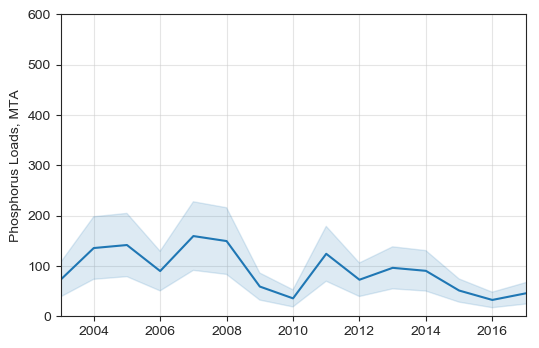

In [9]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

plt.plot(EGRET_Daily_an['waterYear'], EGRET_Daily_an['FluxYearMTA'], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'],
                 EGRET_Daily_an['FluxYearMTA']-EGRET_Daily_an['Fx_SE'],
                 EGRET_Daily_an['FluxYearMTA']+EGRET_Daily_an['Fx_SE'], 
                 color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'], EGRET_Daily_an['FluxYearMTA'])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
plt.ylim(0,600)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Phosphorus Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_PFlux.pdf')


In [159]:
print(EGRET_Daily_an[['waterYear', 'FluxYearMTA','Fx_SE']].round(1).to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 waterYear &  FluxYearMTA &  Fx\_SE \\
\midrule
      2001 &         22.4 &   11.2 \\
      2002 &         52.1 &   24.7 \\
      2003 &         72.4 &   34.1 \\
      2004 &        135.6 &   62.1 \\
      2005 &        141.6 &   62.8 \\
      2006 &         89.8 &   39.4 \\
      2007 &        159.4 &   68.1 \\
      2008 &        149.4 &   66.2 \\
      2009 &         59.1 &   26.9 \\
      2010 &         35.6 &   17.0 \\
      2011 &        124.1 &   54.5 \\
      2012 &         72.6 &   33.3 \\
      2013 &         96.2 &   41.8 \\
      2014 &         90.3 &   40.2 \\
      2015 &         51.2 &   23.0 \\
      2016 &         32.5 &   15.4 \\
      2017 &         45.5 &   21.3 \\
      2018 &         60.0 &   27.3 \\
      2019 &         49.5 &   22.9 \\
\bottomrule
\end{tabular}



In [343]:
EGRET_Daily.groupby(['waterYear'])['FluxYearMTA'].describe()

,count,mean,std,min,25%,50%,75%,max
waterYear,,,,,,,,
1996,274.0,45.450090,154.927809,0.107491,0.587143,2.451271,22.832016,1419.508013
1997,365.0,71.871339,294.147298,0.232104,2.298074,7.870464,39.297391,3754.870840
1998,365.0,85.259313,420.553422,0.265809,1.327804,6.604827,29.823576,6454.933370
1999,365.0,22.920055,117.362999,0.028755,0.434161,1.148823,4.495965,1851.838402
2000,366.0,47.091098,180.605984,0.208652,1.257016,4.280271,20.609851,2203.257500
2001,365.0,14.174214,61.717835,0.065111,0.555528,1.724630,3.692831,679.087142
2002,365.0,40.780103,179.159069,0.040903,0.646393,2.419541,8.752563,1886.041117
2003,365.0,51.655180,158.595164,0.218792,1.708126,5.774820,27.604075,1471.889983
2004,366.0,92.995694,272.424009,0.581799,4.338649,12.515066,40.086364,2026.102642
